In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  

from sklearn.tree import plot_tree  

In [2]:
from sklearn.datasets import load_iris  

iris = load_iris()  
df = pd.DataFrame(iris.data, columns=iris.feature_names)  
df['target'] = iris.target  

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.drop(columns=['target'])  
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=42)

Akurasi Model: 1.00


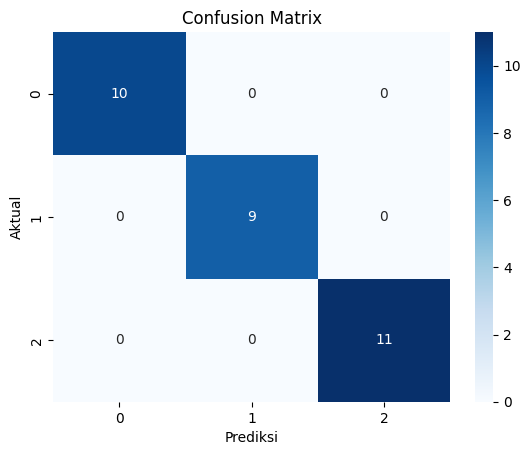

In [6]:
y_pred = rf_model.predict(X_test)  

accuracy = accuracy_score(y_test, y_pred)  
print(f"Akurasi Model: {accuracy:.2f}")  

cm = confusion_matrix(y_test, y_pred)  
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')  
plt.xlabel("Prediksi")  
plt.ylabel("Aktual")  
plt.title("Confusion Matrix")  
plt.savefig('Day_035_01.png', format='png', dpi=300)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_2432\3749641969.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Fitur", data=feature_df, palette="viridis")


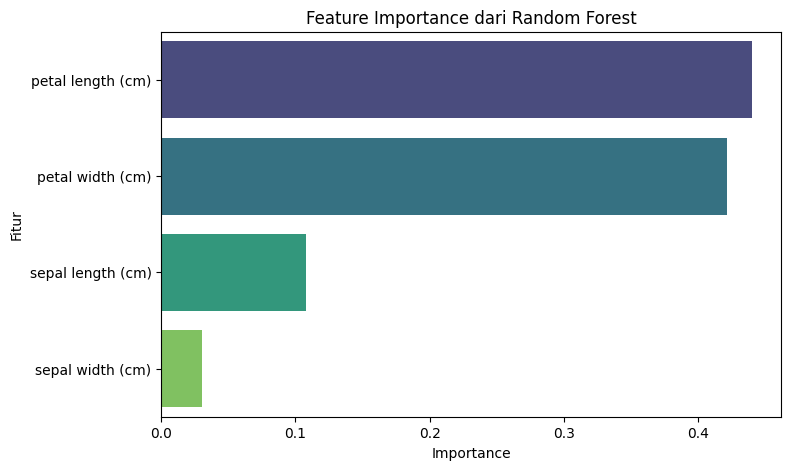

In [7]:
feature_importances = rf_model.feature_importances_  

feature_df = pd.DataFrame({"Fitur": X.columns, "Importance": feature_importances})  
feature_df = feature_df.sort_values(by="Importance", ascending=False)  

plt.figure(figsize=(8,5))  
sns.barplot(x="Importance", y="Fitur", data=feature_df, palette="viridis")  
plt.title("Feature Importance dari Random Forest")  
plt.savefig('Day_035_02.png', format='png', dpi=300)
plt.show()